<a href="https://colab.research.google.com/github/rukka0808/Deep-Learning-Study/blob/main/car_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
!ls -al 'drive/My Drive/darknet'

total 16
drwx------ 2 root root 4096 Jul 16 13:06 cfg
drwx------ 2 root root 4096 Apr 28 06:40 cudnn
drwx------ 2 root root 4096 Jul 16 13:06 data
drwx------ 2 root root 4096 Jul 16 13:06 weights


In [2]:
weight_file = 'drive/My Drive/darknet/weights/yolov3.weights'
cfg_file = 'drive/My Drive/darknet/cfg/yolov3.cfg'
name_file = 'drive/My Drive/darknet/data/coco.names'

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
min_confidence = 0.6

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [7]:
classes = []

In [8]:
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [9]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [10]:
layer_names = net.getLayerNames()

In [11]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [12]:
from google.colab import files
files.upload()

Saving car2.jpg to car2.jpg


{'car2.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x0e\x0e\x10\x0e\x10\x13\x13\x13\x13\x13\x13\x16\x15\x16\x17\x17\x17\x16\x16\x16\x16\x17\x17\x17\x19\x19\x19\x1d\x1d\x1d\x19\x19\x19\x17\x17\x19\x19\x1c\x1c\x1d\x1d ! \x1e\x1e\x1d\x1e!!###**((112<<H\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe

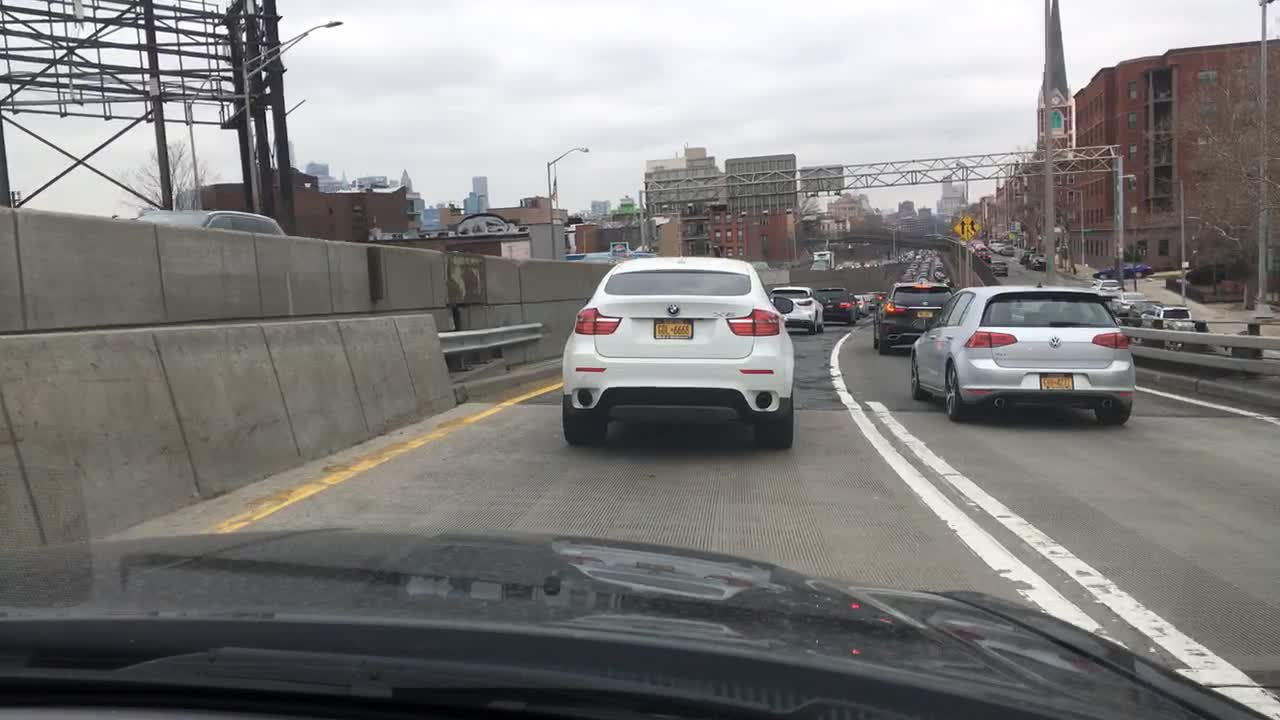

In [13]:
img = cv2.imread('car2.jpg')
height, width, channels = img.shape
cv2_imshow(img)

In [14]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

2 car
3 car
4 car
5 car
6 car
7 car
8 car


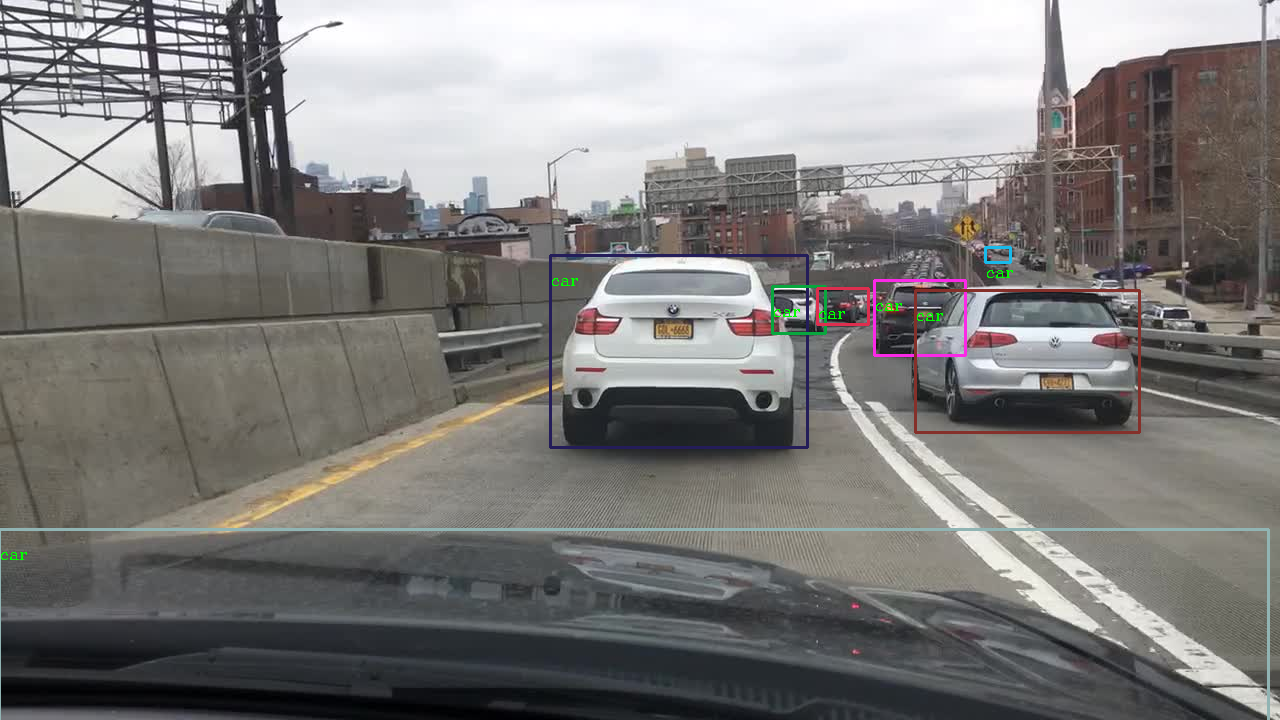

In [17]:
class_ids = []
confidences = []
boxes = []

for out in outs:
  for detection in out:
    scores = detection[5:] #one-hit 구조로 있음
    class_id = np.argmax(scores)
    confidence = scores[class_id] #해당 confidence 담아줌
    if confidence > min_confidence:
      # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(i, label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  

cv2_imshow(img)  